<img src="https://i.imgur.com/kz53mWv.png" width="600">

In [2]:
import pandas as pd

df = pd.read_csv('boston.csv')

# 取出特徵與標記
X, y = df.loc[:, 'CRIM':'LSTAT'], df.loc[:, ['MEDV']]

# 檢查資料維度
X.shape

(506, 13)

In [3]:
from sklearn.model_selection import train_test_split

# 切分訓練與測試資料
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2,
    random_state=0
)

# 檢查訓練資料維度 (樣本數, 特徵數)
X_train.shape

(404, 13)

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor

# 準備模型
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=0), 
    'Random Forest': RandomForestRegressor(random_state=0), 
    'AdaBoost': AdaBoostRegressor(
        estimator=DecisionTreeRegressor(), 
        random_state=0
    ), 
    'GradientBoost': GradientBoostingRegressor(random_state=0)
}

In [6]:
# 利用公式計算調整後 R^2
def adj_R2(r2, n, k):
    return 1 - (n-1)*(1-r2)/(n-k-1)

In [7]:
import pandas as pd

# 儲存分數
scores = {}

# 訓練模型並計算分數
for name, reg in models.items():
    # 訓練模型
    reg.fit(X_train, y_train)
    
    # 計算 R^2
    r2 = reg.score(X_train, y_train)
    
    # 計算調整後 R^2
    scores[(name, 'Train score')] = adj_R2(r2, X_train.shape[0], X_train.shape[1])
    
    # 計算 R^2
    r2 = reg.score(X_test, y_test)
    
    # 計算調整後 R^2
    scores[(name, 'Test score')] = adj_R2(r2, X_test.shape[0], X_test.shape[1])

pd.Series(scores).unstack()

d:\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


,Test score,Train score
AdaBoost,0.624427,0.999558
Decision Tree,0.543094,1.000000
GradientBoost,0.749469,0.981384
Random Forest,0.740029,0.982159


Text(0.5, 0, 'feature importance')

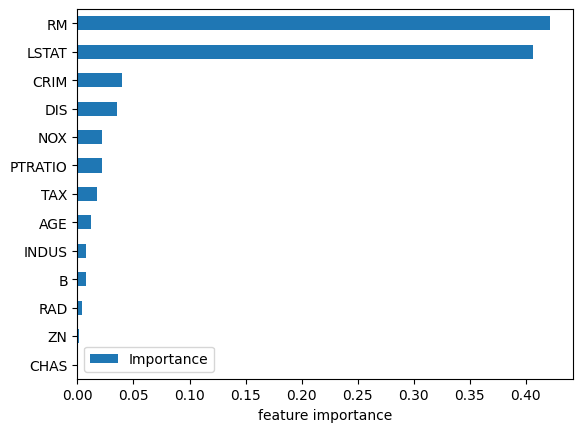

In [ ]:
import matplotlib.pyplot as plt

# 儲存特徵重要性
fea_imp = pd.DataFrame(
    models['Random Forest'].feature_importances_, 
    index=X.columns,
    columns=['Importance']
)

# 依照重要性排序
fea_imp.sort_values(
    by='Importance', 
    ascending=True, 
    inplace=True
)

# 繪製水平長條圖
fea_imp.plot(kind='barh')
plt.xlabel('feature importance')

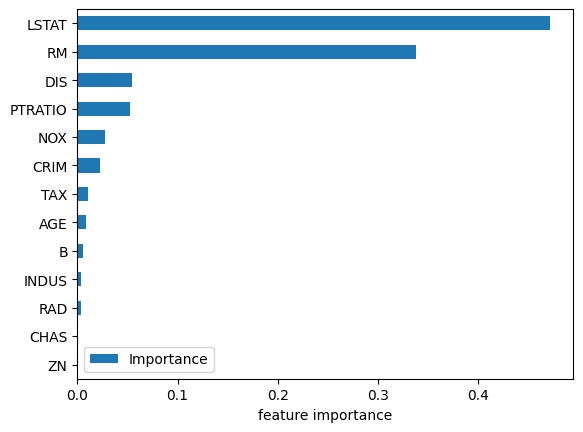

In [10]:
# 儲存特徵重要性
fea_imp = pd.DataFrame(
    models['GradientBoost'].feature_importances_, 
    index=X.columns, 
    columns=['Importance']
)

# 依照重要性排序
fea_imp.sort_values(by='Importance', ascending=True, inplace=True)

# 繪製水平長條圖
fea_imp.plot(kind='barh')
plt.xlabel('feature importance');